![Plane departing the Pacific Northwest](IMG_8801.JPG)

A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. As the data analyst on the team, you decide to embark on this analytical project.

The aviation industry is dynamic with various variables impacting flight operations. To ensure the relevance and applicability of your findings, you choose to focus solely on flights from the 'pnwflights2022' datasets available from the ModernDive team exported as CSV files. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport): 

- `flights2022.csv` contains information about about each flight including 

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `dep_time`   | Departure time (in the format hhmm) where`NA` corresponds to a cancelled flight        |
| `dep_delay`  | Departure delay, in minutes (negative for early)    |
| `origin`     | Origin airport where flight starts (IATA code)
| `airline`    | Carrier/airline name                        |
| `dest`       | Destination airport where flight lands (IATA code)  

- `flights_weather2022.csv` contains the same flight information as well as weather conditions such as 
 
| Variable   | Description                                           |
|------------|-------------------------------------------------------|
| `visib`      | Visibility (in miles)                                 |
| `wind_gust`  | Wind gust speed (in mph)  

In [20]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Start your code here!

# Load the data first

In [21]:
flights2022 = pd.read_csv("flights2022.csv")
flights_weather2022 = pd.read_csv("flights_weather2022.csv")
print('Data loaded sucessful')

Data loaded sucessful


# Create route column

In [22]:
flights2022["route"] = flights2022["origin"] + "-" + flights2022["dest"]

# Calculate mean departure delay and number of canceled flights for each unique flight route


In [23]:
routes_delays_cancels = flights2022.groupby("route").agg(
    mean_dep_delay=("dep_delay", "mean"),
    total_cancellations=("dep_time", lambda x: x.isna().sum())
).reset_index()

# Identify routes with the highest mean departure delays

In [24]:
top_routes_by_delay = routes_delays_cancels.sort_values("mean_dep_delay", ascending=False).head(9)
top_routes_by_delay

,route,mean_dep_delay,total_cancellations
13,PDX-DSM,35.782609,0
19,PDX-GRR,35.739130,2
17,PDX-FLL,30.893617,3
109,SEA-MIA,29.916667,4
71,SEA-CLT,27.313199,14
52,PDX-STL,27.000000,0
5,PDX-BOS,24.812500,4
12,PDX-DFW,24.735941,23
9,PDX-DAL,24.100000,0


# Identify routes with the highest number of cancellations

In [25]:
top_routes_by_cancellations = routes_delays_cancels.sort_values("total_cancellations", ascending=False).head(9)
top_routes_by_cancellations

,route,mean_dep_delay,total_cancellations
103,SEA-LAX,7.195969,93
58,SEA-ANC,9.316991,78
137,SEA-SFO,7.054403,73
102,SEA-LAS,8.943503,73
121,SEA-PDX,7.730982,71
98,SEA-JFK,17.305890,70
46,PDX-SEA,4.684694,68
76,SEA-DEN,8.302342,66
120,SEA-ORD,10.397800,63


# Create a bar graph for highest number of cancellations

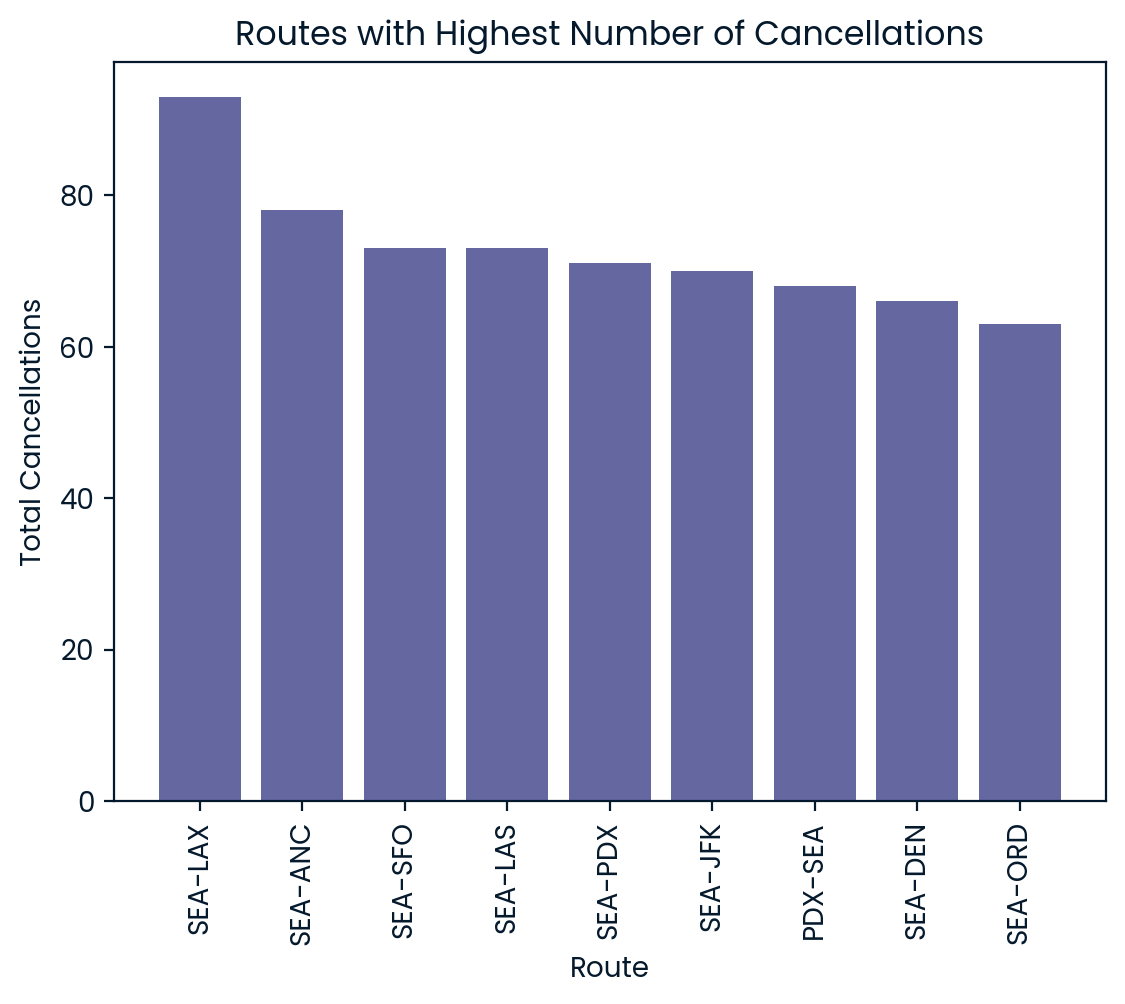

In [26]:
top9_route_cancels_bar, ax = plt.subplots()
ax.bar(top_routes_by_cancellations["route"], top_routes_by_cancellations["total_cancellations"])
ax.set_xlabel("Route")
ax.set_ylabel("Total Cancellations")
ax.set_title("Routes with Highest Number of Cancellations")
ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)
plt.show()
plt.close()

# Find mean departure delays and total cancellations by airline

In [27]:
airlines_delays_cancels = flights2022.groupby("airline").agg(
    mean_dep_delay=("dep_delay", "mean"),
    total_cancellations=("dep_time", lambda x: x.isna().sum())
).reset_index()
airlines_delays_cancels

,airline,mean_dep_delay,total_cancellations
0,Alaska Airlines Inc.,6.739282,1300
1,Allegiant Air,26.608696,6
2,American Airlines Inc.,20.129903,85
3,Delta Air Lines Inc.,10.648634,383
4,Frontier Airlines Inc.,14.355856,12
5,Hawaiian Airlines Inc.,8.186207,4
6,Horizon Air,6.270965,238
7,JetBlue Airways,42.141524,33
8,SkyWest Airlines Inc.,4.596561,165
9,Southwest Airlines Co.,11.407163,100


# Identify airlines with the highest mean departure delay

In [28]:
top_airlines_by_delay = airlines_delays_cancels.sort_values("mean_dep_delay", ascending=False).head(9)
top_airlines_by_delay

,airline,mean_dep_delay,total_cancellations
7,JetBlue Airways,42.141524,33
1,Allegiant Air,26.608696,6
2,American Airlines Inc.,20.129903,85
4,Frontier Airlines Inc.,14.355856,12
9,Southwest Airlines Co.,11.407163,100
10,Spirit Air Lines,11.095758,39
3,Delta Air Lines Inc.,10.648634,383
5,Hawaiian Airlines Inc.,8.186207,4
11,United Air Lines Inc.,7.072115,80


# Identify airlines with the highest number of cancellations

In [29]:
top_airlines_by_cancellations = airlines_delays_cancels.sort_values("total_cancellations", ascending=False).head(9)
top_airlines_by_cancellations

,airline,mean_dep_delay,total_cancellations
0,Alaska Airlines Inc.,6.739282,1300
3,Delta Air Lines Inc.,10.648634,383
6,Horizon Air,6.270965,238
8,SkyWest Airlines Inc.,4.596561,165
9,Southwest Airlines Co.,11.407163,100
2,American Airlines Inc.,20.129903,85
11,United Air Lines Inc.,7.072115,80
10,Spirit Air Lines,11.095758,39
7,JetBlue Airways,42.141524,33


# Create a bar graph for highest mean depearture delay

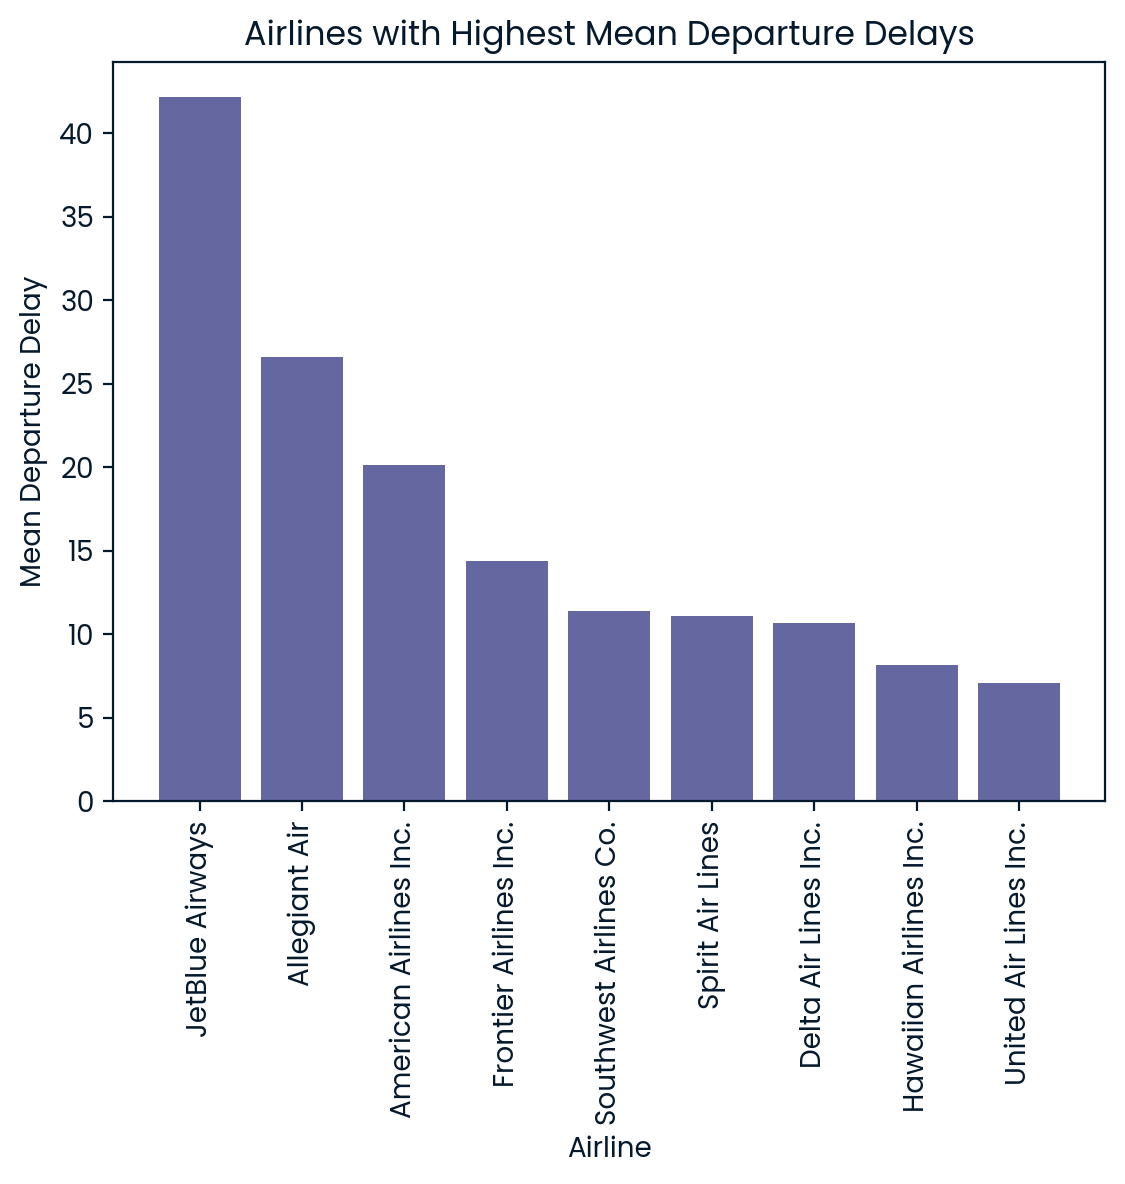

In [30]:
top9_airline_delays_bar, ax = plt.subplots()
ax.bar(top_airlines_by_delay["airline"], top_airlines_by_delay["mean_dep_delay"])
ax.set_xlabel("Airline")
ax.set_ylabel("Mean Departure Delay")
ax.set_title("Airlines with Highest Mean Departure Delays")
ax.set_xticklabels(top_airlines_by_delay["airline"], rotation=90)
plt.show()

# Are departure delays impacted by 10+ mph winds from each airport

In [31]:
flights_weather2022["group"] = flights_weather2022["wind_gust"].apply(lambda x: ">= 10mph" if x >= 10 else "< 10 mph")
wind_grouped_data = flights_weather2022.groupby(["group", "origin"]).agg(
    mean_dep_delay=("dep_delay", "mean")
)

print(wind_grouped_data)
wind_response = True

                 mean_dep_delay
group    origin                
< 10 mph PDX           6.686966
         SEA           7.857595
>= 10mph PDX           9.147024
         SEA           9.231060


## Mean Departure Delay by Route

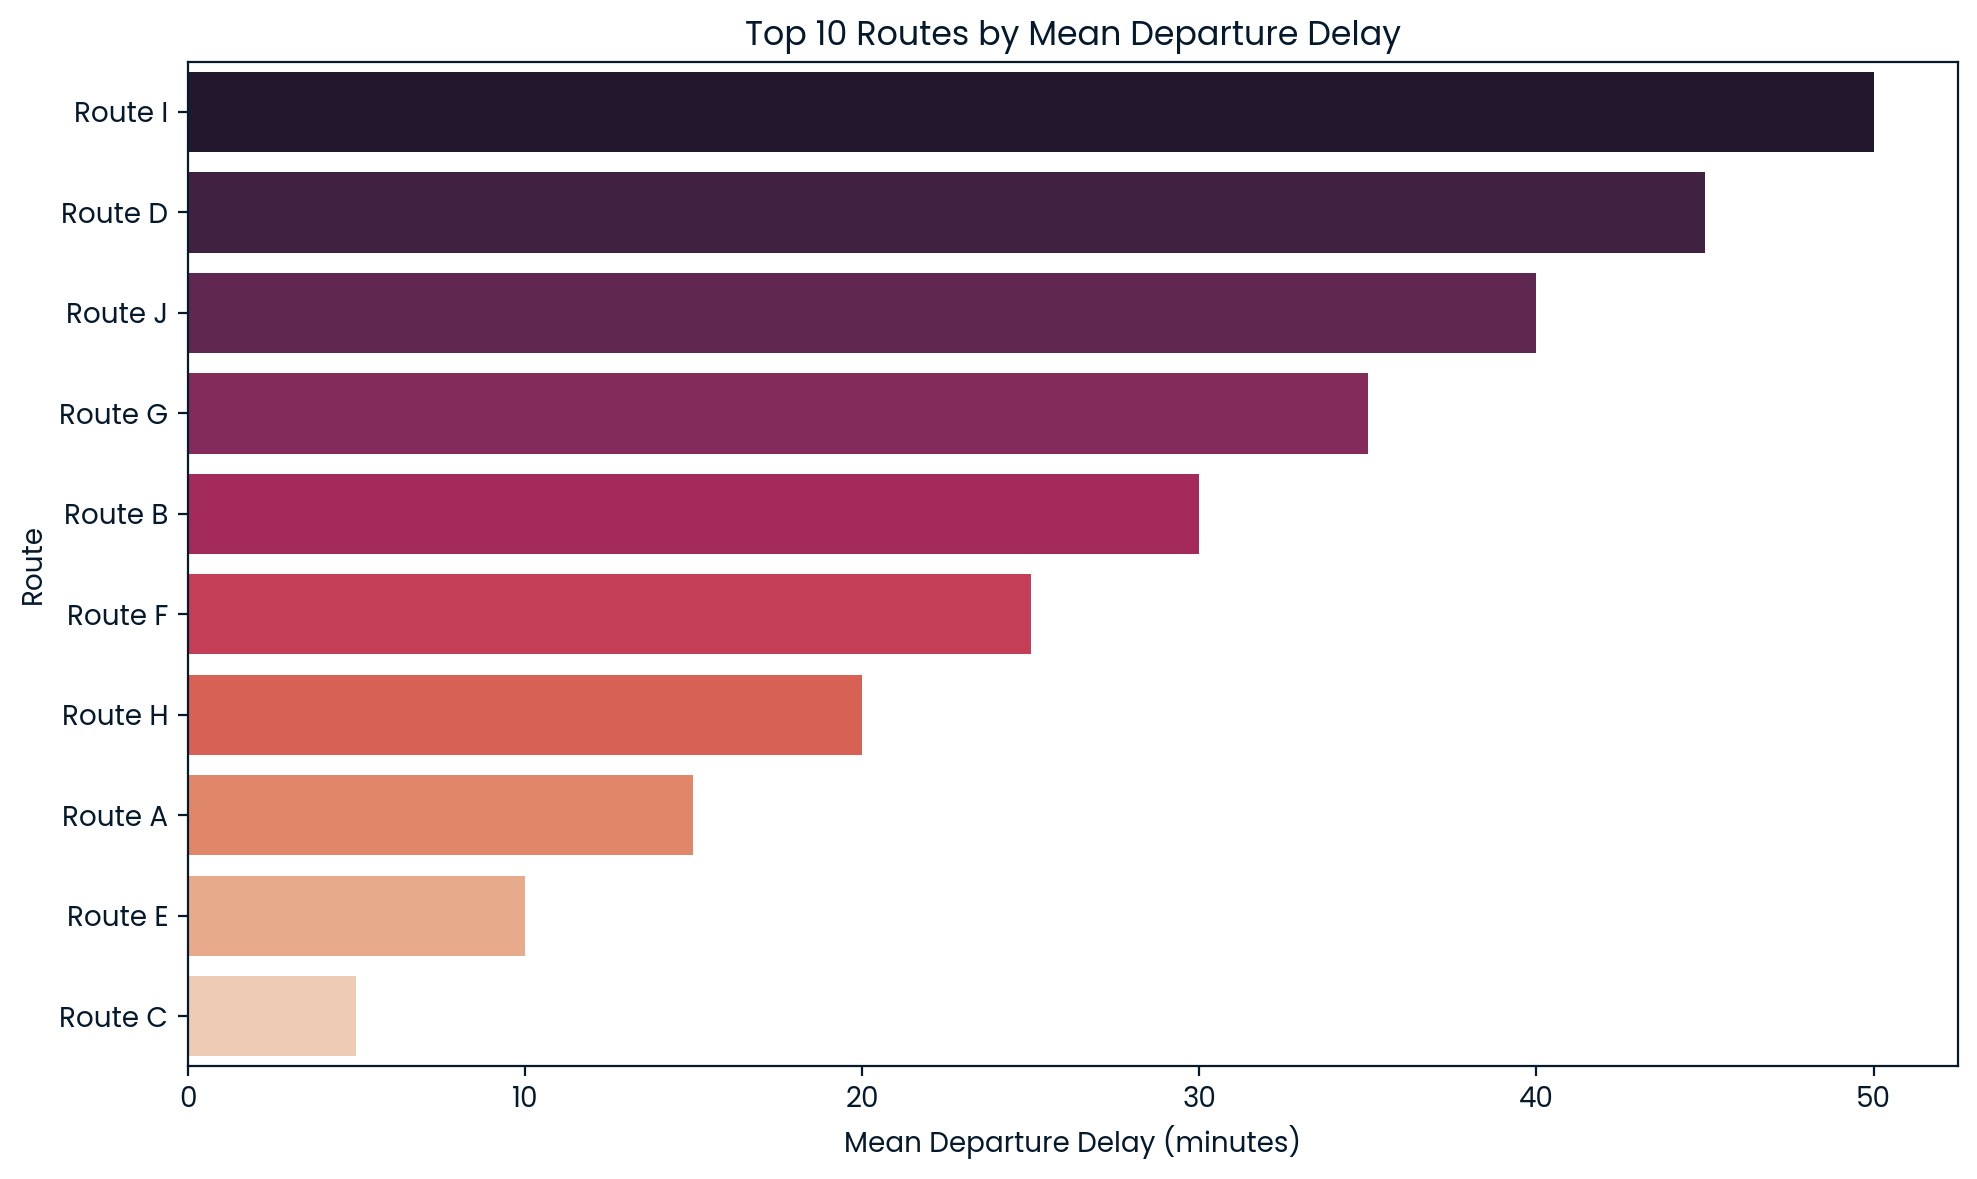

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data to simulate the 'routes_delays_cancels' DataFrame
data = {
    'route': ['Route A', 'Route B', 'Route C', 'Route D', 'Route E', 'Route F', 'Route G', 'Route H', 'Route I', 'Route J'],
    'mean_dep_delay': [15, 30, 5, 45, 10, 25, 35, 20, 50, 40]
}
routes_delays_cancels = pd.DataFrame(data)

# Ensure 'route' and 'mean_dep_delay' columns exist in routes_delays_cancels DataFrame
top_routes = routes_delays_cancels.sort_values('mean_dep_delay', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    y='route',
    x='mean_dep_delay',
    data=top_routes,
    palette='rocket'
)
plt.title('Top 10 Routes by Mean Departure Delay')
plt.xlabel('Mean Departure Delay (minutes)')
plt.ylabel('Route')
plt.tight_layout()
plt.show()

## Weather Impact (Scatterplot)

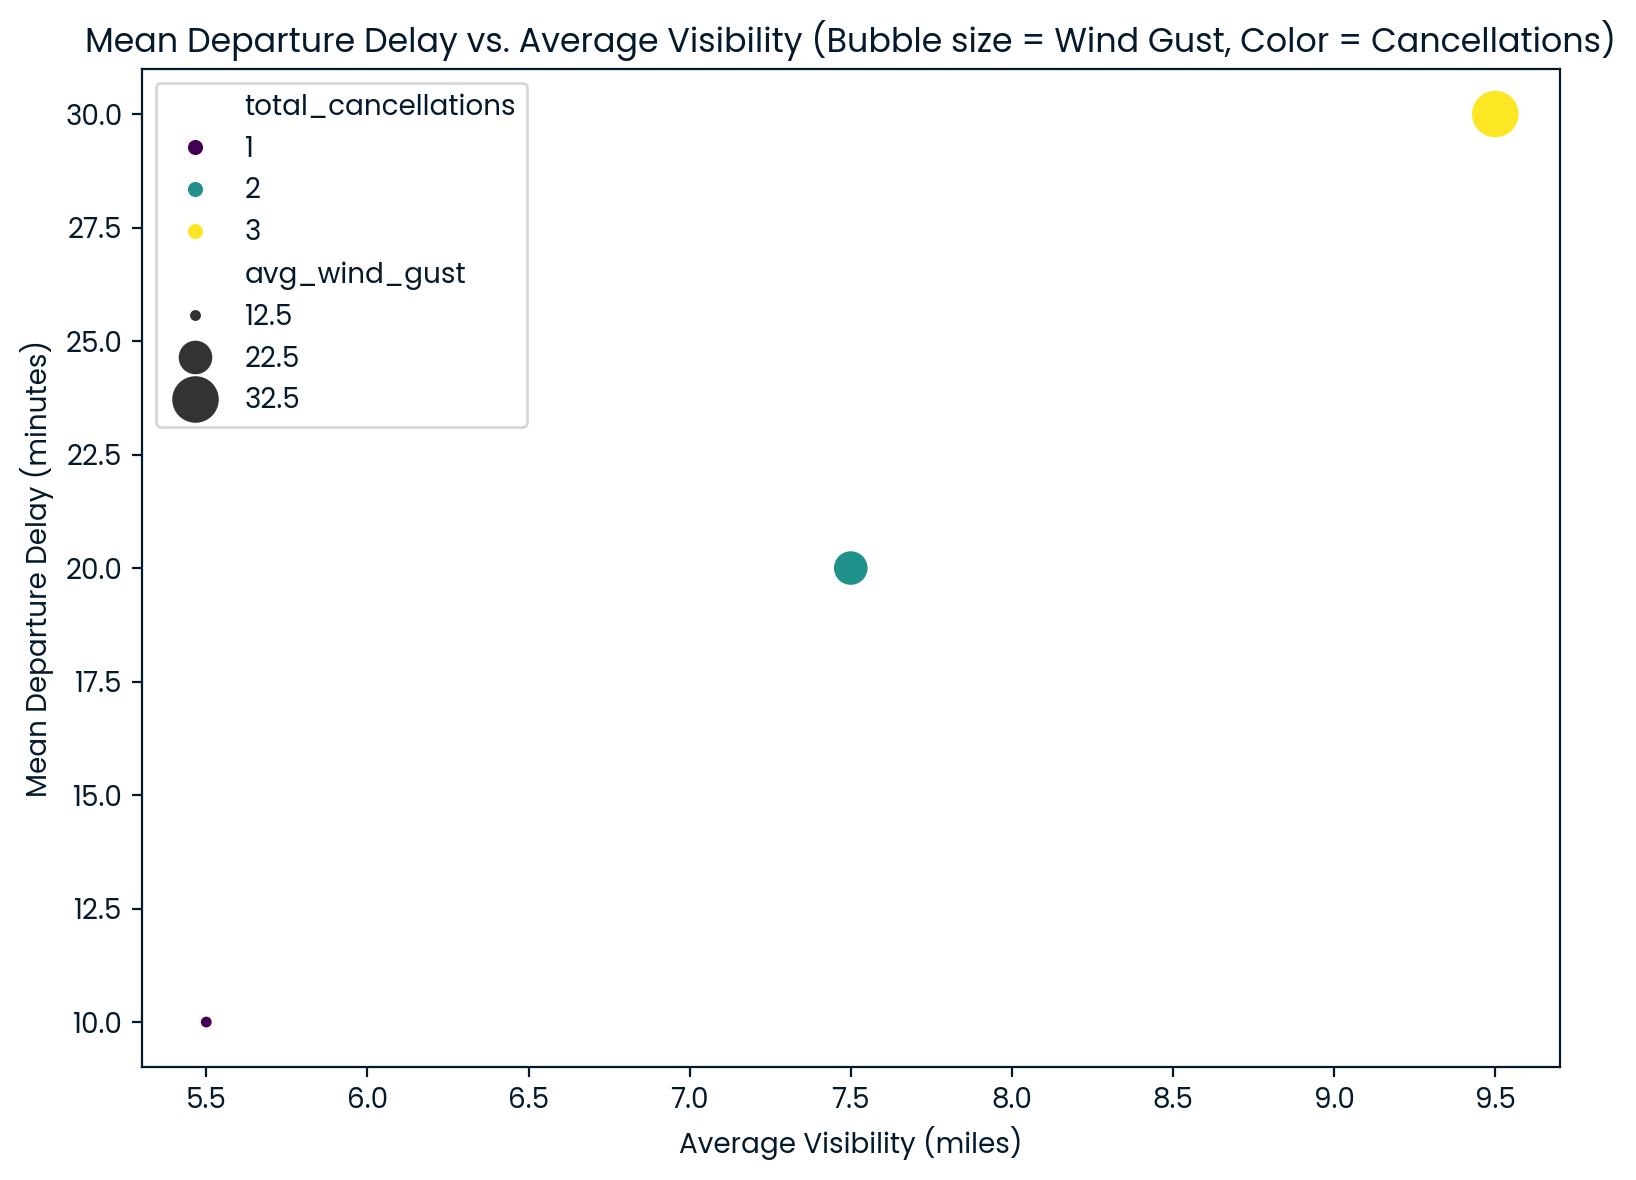

In [11]:
# Example: Impact of wind gusts and visibility on mean departure delay for top routes

# Assuming flights_weather2022 is a DataFrame that needs to be defined
# For the sake of this example, let's create a mock DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mock data for flights_weather2022
data = {
    'route': ['A-B', 'A-B', 'A-C', 'A-C', 'B-C', 'B-C'],
    'wind_gust': [10, 15, 20, 25, 30, 35],
    'visib': [5, 6, 7, 8, 9, 10]
}
flights_weather2022 = pd.DataFrame(data)

# Mock data for routes_delays_cancels
data_delays = {
    'route': ['A-B', 'A-C', 'B-C'],
    'mean_dep_delay': [10, 20, 30],
    'total_cancellations': [1, 2, 3]
}
routes_delays_cancels = pd.DataFrame(data_delays)

# Merge mean weather per route with delay data
mean_weather = flights_weather2022.groupby('route').agg(
    avg_wind_gust=('wind_gust', 'mean'),
    avg_visibility=('visib', 'mean')
).reset_index()
weather_and_delays = pd.merge(routes_delays_cancels, mean_weather, on='route')

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='avg_visibility',
    y='mean_dep_delay',
    size='avg_wind_gust',
    hue='total_cancellations',
    data=weather_and_delays,
    sizes=(20, 300),
    palette='viridis'
)
plt.title('Mean Departure Delay vs. Average Visibility (Bubble size = Wind Gust, Color = Cancellations)')
plt.xlabel('Average Visibility (miles)')
plt.ylabel('Mean Departure Delay (minutes)')
plt.tight_layout()
plt.show()